In [47]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pandas import get_dummies
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

<h1>Load data</h1>

In [48]:
file_name = "iris.data.csv"

In [49]:
#load the dataset into memory
dataset = pd.read_csv(file_name,header=None,\
                      names=['sepal_length','sepal_width','petal_length','petal_width','species'])
#check several examples of data
dataset.head()
print(dataset.head())
#simple function to process the data.
"""
input:
    data: iris dataset
    num_features: 2 => select only petal width and petal width.
                  4 => select all features
    flower: 'Iris-setosa' => labels of Iris-setosa will be 1 and others will be 0
            'Iris-virginica' => labels of Iris-virginica will be 1 and others will be 0
            'None' => use one-hot encoding to represent the labels

return:
    x: normalized & shuffled data
    y: labels
"""
def data_preprocessing(data,num_features,flower=None):
    if num_features==2:
        features = data.columns[2:4]
    else:
        features = data.columns[0:4]
    labels = dataset.columns[4]
    print(features)
    print(labels)
    #normalize the data
    data_norm = pd.DataFrame(data)
    for feature in features:
        data[feature] = (data[feature]-data[feature].mean())/data[feature].std()

    #shuffle the data
    indices = data_norm.index.tolist()
    indices = np.array(indices)
    np.random.shuffle(indices)
    x = data_norm.reindex(indices)[features]
    y = data_norm.reindex(indices)[labels]
    if flower=='Iris-setosa':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-setosa' else 0
        y = y.values.reshape(len(y),1)
    elif flower=='Iris-virginica':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-virginica' else 0
        y = y.values.reshape(len(y),1)
    else:
        y = get_dummies(y)
    return x,y


x_1,y_1 = data_preprocessing(dataset,2,flower='Iris-setosa')
#generate traning and validation sets
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size=0.3)

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Index(['petal_length', 'petal_width'], dtype='object')
species


<h1>Data preprocessing</h1>

#simple function to process the data.
"""
input:
    data: iris dataset
    num_features: 2 => select only petal width and petal width.
                  4 => select all features
    flower: 'Iris-setosa' => labels of Iris-setosa will be 1 and others will be 0
            'Iris-virginica' => labels of Iris-virginica will be 1 and others will be 0
            'None' => use one-hot encoding to represent the labels

return:
    x: normalized & shuffled data
    y: labels
"""
def data_preprocessing(data,num_features,flower=None):
    if num_features==2:
        features = data.columns[2:4]
    else:
        features = data.columns[0:4]
    labels = dataset.columns[4]
    print(features)
    print(labels)
    #normalize the data
    data_norm = pd.DataFrame(data)
    for feature in features:
        data[feature] = (data[feature]-data[feature].mean())/data[feature].std()

    #shuffle the data
    indices = data_norm.index.tolist()
    indices = np.array(indices)
    np.random.shuffle(indices)
    x = data_norm.reindex(indices)[features]
    y = data_norm.reindex(indices)[labels]
    if flower=='Iris-setosa':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-setosa' else 0
        y = y.values.reshape(len(y),1)
    elif flower=='Iris-virginica':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-virginica' else 0
        y = y.values.reshape(len(y),1)
    else:
        y = get_dummies(y)
    return x,y

<h1>Part a:

In [50]:
x_1,y_1 = data_preprocessing(dataset,2,flower='Iris-setosa')
#generate traning and validation sets
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size=0.3)

Index(['petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameters</h2>

In [51]:
lr = 0.01
epochs = 100

<h2>Define Placeholder and Variables</h2>

In [52]:
tf.reset_default_graph()
#tf graph input
X = tf.placeholder(tf.float32,[None,2],name='X')
Y = tf.placeholder(tf.float32,[None,1],name='Y')
#define the weights and initialized with random normal distribution
W = tf.Variable(tf.random_normal([2,1]),tf.float32,name='W')
#define the bias with zero initialization
b = tf.Variable(tf.zeros([1,1]),tf.float32,name='b')

<h2>Define update rule and accuracy</h2>

In [53]:
#define the predicted output label, Tensorflow doesn't have step function, we use tf.round to do that
Y_hat = tf.round(tf.sigmoid(tf.add(tf.matmul(X,W),b)))
#the error between target and logit
error = Y-Y_hat

#weight and bias update rule w(t+1) = w(t) + learning_rate * error * x
dW = tf.matmul(tf.transpose(X),error)
db = tf.reduce_sum(error,0)
W_ = W + lr*dW
b_ = b + lr*db

#group two operations together
step = tf.group(W.assign(W_), b.assign(b_))


<h2>Execute training</h2>

In [54]:
#initialize tensorflow variables
init = tf.global_variables_initializer()

#start tensorflow session
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for i in range(epochs):
        #every iteration we run optimization on the training data X and labels Y
        sess.run(step,feed_dict = {X:x_train_1,Y:y_train_1})
    
    #after training, we acquire the weight and bias
    #np.squeeze plays a role to get rid of the redundant dimension [i.e.make (2,1) be (2,)]
    W = np.squeeze(sess.run(W))
    b = np.squeeze(sess.run(b))
    pred=sess.run(Y_hat,feed_dict = {X:x_test_1})

<h2>Plot</h2>

<class 'numpy.float32'> <class 'numpy.float32'>
[[33  0]
 [ 0 12]]
test set accuracy: 1


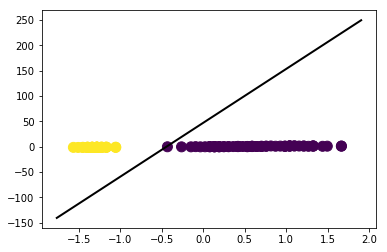

In [55]:
x_train_1 = x_train_1.values
y_test_1 = y_test_1.astype('float32')
print(type(y_test_1[0][0]),type(pred[0][0]))
cm=confusion_matrix(y_test_1,pred)
print(cm)
succ = cm[0][0]+cm[1][1]
fail = cm[0][1]+cm[1][0]
if fail == 0:
    acc = 1
else:
    acc = succ/(succ+fail)
print('test set accuracy:',acc)
plot_x = np.array([np.min(x_train_1[:, 0] - 0.2), np.max(x_train_1[:, 1]+0.2)])
plot_y = 1 / W[1] * (-W[0] * plot_x - b)

plt.scatter(x_train_1[:, 0], x_train_1[:, 1], c=np.squeeze(y_train_1), s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.show()

The classification graph shows that the two classes (setosa and non-setosa) are relatively far away. This means that in these three species of flowers, two of them have very close features. The accuracy on test data is 100%, which is reasonable because of the very different features of setosa and non-setosa.

<h1>Part b:</h1>

In [56]:
x_2,y_2 = data_preprocessing(dataset,2,flower='Iris-virginica')
#generate traning and validation sets
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2,test_size=0.3)

Index(['petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameter</h2>

In [57]:
lr = 0.01
epochs = 100


<h2>Define Placeholder and Variables</h2>

In [58]:
tf.reset_default_graph()
#tf graph input
X2 = tf.placeholder(tf.float32,[None,2],name='X2')
Y2 = tf.placeholder(tf.float32,[None,1],name='Y2')
#define the weights and initialized with random normal distribution
W2 = tf.Variable(tf.random_normal([2,1]),tf.float32,name='W2')
#define the bias with zero initialization
b2 = tf.Variable(tf.zeros([1,1]),tf.float32,name='b2')

<h2>Define update rule and accuracy</h2>

In [59]:
#define the predicted output label, Tensorflow doesn't have step function, we use tf.round to do that
Y_hat2 = tf.round(tf.sigmoid(tf.add(tf.matmul(X2,W2),b2)))
#the error between target and logit
error2 = Y2-Y_hat2

#weight and bias update rule w(t+1) = w(t) + learning_rate * error * x
dW2 = tf.matmul(tf.transpose(X2),error2)
db2 = tf.reduce_sum(error2,0)
W_2 = W2 + lr*dW2
b_2 = b2 + lr*db2

#group two operations together
step2 = tf.group(W2.assign(W_2), b2.assign(b_2))
#compare the predicted labels with true labels
correct_pred2 = tf.equal(tf.argmax(Y_hat2,1),tf.argmax(Y2,1))

#compute the accuracy by taking average
accuracy2 = tf.reduce_mean(tf.cast(correct_pred2,tf.float32),name='accuracy2')
C2 = []

<h2>Execute training</h2>

In [60]:
#initialize tensorflow variables
init = tf.global_variables_initializer()

#start tensorflow session
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for i in range(epochs):
        #every iteration we run optimization on the training data X and labels Y
        sess.run(step2,feed_dict = {X2:x_train_2,Y2:y_train_2})
        c2 = sess.run(error2,feed_dict = {X2:x_train_2,Y2:y_train_2})
        C2.append(c2)
        if i % 10 ==0:
            acc = sess.run(accuracy2,feed_dict={X2:x_train_2, Y2:y_train_2})
            print("step "+str(i)+", Accuracy= {:.3f}".format(acc))
    #after training, we acquire the weight and bias
    #np.squeeze plays a role to get rid of the redundant dimension [i.e.make (2,1) be (2,)]
    W2 = np.squeeze(sess.run(W2))
    b2 = np.squeeze(sess.run(b2))
    pred2=sess.run(Y_hat2,feed_dict = {X2:x_test_2})

step 0, Accuracy= 1.000
step 10, Accuracy= 1.000
step 20, Accuracy= 1.000
step 30, Accuracy= 1.000
step 40, Accuracy= 1.000
step 50, Accuracy= 1.000
step 60, Accuracy= 1.000
step 70, Accuracy= 1.000
step 80, Accuracy= 1.000
step 90, Accuracy= 1.000


<h2>Plot</h2>

<class 'numpy.float32'> <class 'numpy.float32'>
[[31  1]
 [ 1 12]]
test set accuracy: 0.9555555555555556


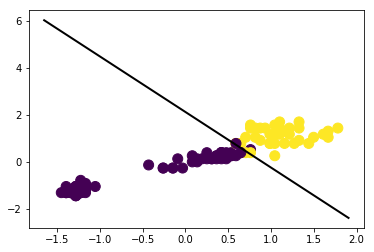

In [61]:
x_train_2 = x_train_2.values
y_test_2 = y_test_2.astype('float32')
print(type(y_test_2[0][0]),type(pred2[0][0]))
cm=confusion_matrix(y_test_2,pred2)
print(cm)
succ = cm[0][0]+cm[1][1]
fail = cm[0][1]+cm[1][0]
if fail == 0:
    acc = 1
else:
    acc = succ/(succ+fail)
print('test set accuracy:',acc)
plot_x = np.array([np.min(x_train_2[:, 0] - 0.2), np.max(x_train_2[:, 1]+0.2)])
plot_y = 1 / W2[1] * (-W2[0] * plot_x - b2)

plt.scatter(x_train_2[:, 0], x_train_2[:, 1], c=np.squeeze(y_train_2), s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.show()

The accuracy on test data (93%) is lower than part a because the species of Virginica and Versicolor have similar features which causes error at the boundary.

<h1>Part c:</h1>

In [62]:
x_3,y_3 = data_preprocessing(dataset,4)
#generate traning and validation sets
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3,y_3,test_size=0.3)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameters</h2>

In [63]:
lr = 0.01
epochs = 100

<h2>Define placehoder and variables</h2>

In [64]:
tf.reset_default_graph()

#tf graph input
X3 = tf.placeholder(tf.float32,[None,4],name='X3')
Y3 = tf.placeholder(tf.float32,[None,3],name='Y3')
#define the weights and initialized with random normal distribution
W1 = tf.Variable(tf.random_normal([4,256]),tf.float32,name='W1')
W2 = tf.Variable(tf.random_normal([256,128]),tf.float32,name='W2')
W3 = tf.Variable(tf.random_normal([128,3]),tf.float32,name='W3')
#define the bias with zero initialization
b1 = tf.Variable(tf.zeros([256]),tf.float32,name='b1')
b2 = tf.Variable(tf.zeros([128]),tf.float32,name='b2')
b3 = tf.Variable(tf.zeros([3]),tf.float32,name='b3')

<h2>Define the neural network</h2>

In [65]:
def forward(x,w1,b1,w2,b2,w3,b3,train=True):
    Z = tf.nn.relu(tf.matmul(x,w1)+b1)
    Z1 = tf.nn.relu(tf.matmul(Z,w2)+b2)
    Z2 = tf.matmul(Z1,w3)+b3
    
    if train:
        return Z2
    else:
        return tf.nn.softmax(Z2)
y_hat = forward(X3,W1,b1,W2,b2,W3,b3)
predc = forward(X3,W1,b1,W2,b2,W3,b3,False)

<h2>Define cost function and accuracy</h2>

In [66]:
cost = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits_v2(
                logits=y_hat,labels=y_train_3))
train = tf.train.GradientDescentOptimizer(lr).minimize(cost)
#compare the predicted labels with true labels
correct_pred3 = tf.equal(tf.argmax(y_hat,1),tf.argmax(Y3,1))

#compute the accuracy by taking average
accuracy3 = tf.reduce_mean(tf.cast(correct_pred3,tf.float32),name='accuracy3')
C3 = []

<h2>Execute training</h2>

In [67]:
#initialize tensorflow variables
init = tf.global_variables_initializer()

#start tensorflow session
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for i in range(epochs):
        #every iteration we run optimization on the training data X and labels Y
        sess.run(train,feed_dict = {X3:x_train_3,Y3:y_train_3})
        c3 = sess.run(cost,feed_dict = {X3:x_train_3,Y3:y_train_3})
        C3.append(c3)
        if i % 10 ==0:
            acc = sess.run(accuracy3,feed_dict={X3:x_train_3, Y3:y_train_3})
            print("step "+str(i)+", Accuracy= {:.3f}".format(acc))
    pred3=sess.run(predc,feed_dict = {X3:x_test_3})

step 0, Accuracy= 0.810
step 10, Accuracy= 0.886
step 20, Accuracy= 0.943
step 30, Accuracy= 0.952
step 40, Accuracy= 0.962
step 50, Accuracy= 0.962
step 60, Accuracy= 1.000
step 70, Accuracy= 1.000
step 80, Accuracy= 1.000
step 90, Accuracy= 1.000


<h2>Plot</h2>

Testing ACcuracy: 1.0


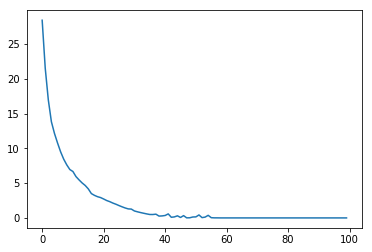

In [68]:
#accuracy on test data
pred3 = np.round(pred3)
x_train_3 = x_train_3.values
y_test_3 = y_test_3.values
y_test_3 = y_test_3.astype('float32')
count = 0
total = 0
for i in range(len(pred3)):
    if pred3[i].all() == y_test_3[i].all():
        count+=1
    total+=1
    
acc = count/total
print('Testing ACcuracy:',acc)
#plot cost
plt.plot(C3)
plt.show()